### k-Nearest Neighbor Task

##### 수면 중 스트레스 정도 예측

##### feature
- sr(snoring_rate): 수면 중 코골이의 속도 또는 강도, 어떤 단위 또는 규모로 측정될 수 있습니다  
- rr(respiration_rate): 수면 중 분당 취해진 호흡의 수  
- t(body_temperature): 수면 중 사용자의 체온으로, 섭씨 또는 화씨로 측정될 수 있습니다  
- lm(limb_movement): 수면 중 사지 운동의 속도 또는 강도로, 그 사람이 얼마나 활동적이거나 불안정한지를 나타냅니다  
- bo(blood_oxygen): 수면 중 혈액에 존재하는 산소의 양을 나타내는 혈중 산소 농도입니다  
- rem(eye_movement): 수면 중 안구 운동 활동으로, 수면 중 급격한 안구 운동(REM) 단계를 나타낼 수 있습니다  
- sr.1(sleeping_hours): 특정 수면 시간 동안 잠을 잔 시간입니다  
- hr(heart_rate): 수면 중 분당 심장 박동 수, 전반적인 건강 및 수면의 질과 관련된 필수 생리학적 매개 변수  

##### target
- sl(stress_level): 수면 중 스트레스 정도를 나타내는 목표 변수로 다음과 같이 구분됩니다

In [2]:
import pandas as pd

st_df = pd.read_csv('./datasets/stress_in_sleep.csv')
st_df

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
...,...,...,...,...,...,...,...,...,...
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1


In [4]:
st_df.isna().sum()

sr      0
rr      0
t       0
lm      0
bo      0
rem     0
sr.1    0
hr      0
sl      0
dtype: int64

In [6]:
st_df.duplicated().sum()

0

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

k_neighbors_classifier = KNeighborsClassifier()

grid_knn = GridSearchCV(k_neighbors_classifier, {'n_neighbors': [2,3, 5, 7, 9, 11]}, cv=3, refit=True, return_train_score=True)

In [9]:
from sklearn.model_selection import train_test_split

features, targets = st_df.iloc[:,:-1], st_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2,stratify=targets)

grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 7, 9, 11]},
             return_train_score=True)

In [18]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction ,average="macro")
#     재현율
    recall = recall_score(y_test , prediction,average="macro")
#     F1 score
    f1 = f1_score(y_test, prediction,average="macro")
#     ROC-AUC
#     roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy , precision ,recall, f1))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[26  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 25]]
정확도: 1.0000, 정밀도: 1.0000, 재현율: 1.0000, F1:1.0000
###########################################################################


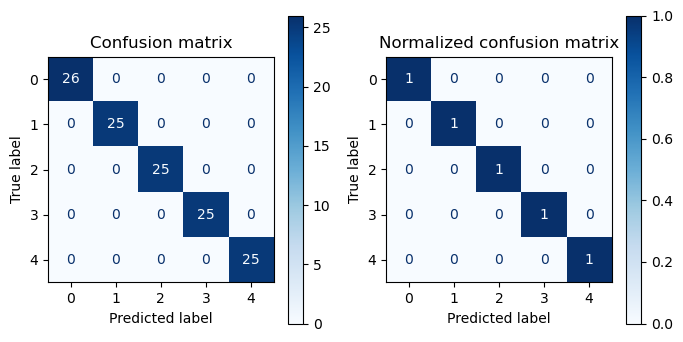

1.0

In [21]:
y_pred = grid_knn.predict(X_test)

get_evaluation(y_test,y_pred,grid_knn,X_test)
accuracy_score(y_test,y_pred)